In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sympy import solve

In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

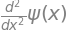

In [4]:
psi(x).diff(x, x)

In [5]:
-k**2 * psi(x)

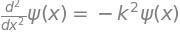

In [6]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [7]:
sp.dsolve(eq, psi(x))

In [8]:
sp.dsolve(eq, psi(x), ics={psi(0): 0, psi(a): 0})

In [9]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol

In [10]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [11]:
sol.lhs, sol.rhs

In [12]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

In [13]:
#Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

In [15]:
sol.rhs * x * sol.rhs

In [16]:
x_jeden = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
x_jeden

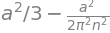

In [17]:
x_dwa=sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
x_dwa

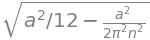

In [19]:
#Sprawdzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.
#Liczymy wariancjeX
wariancja_x = sp.sqrt(x_dwa - x_jeden**2)
wariancja_x

In [20]:
#wyliczamy teraz calke dla pedu
i = sp.I
i
sol.rhs * -i * h * sol.rhs.diff(x)

In [21]:
ped_jeden = sp.integrate(sol.rhs * -i * h * sol.rhs.diff(x), (x, 0, a))
ped_jeden

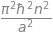

In [22]:
ped_dwa = sp.integrate(sol.rhs * -h**2 * sol.rhs.diff(x, x), (x, 0, a))
ped_dwa

In [23]:
wariancja_ped = sp.sqrt(ped_dwa - ped_jeden**2)
wariancja_ped

In [24]:
iloczyn_wariancji = (wariancja_x * wariancja_ped).simplify()
iloczyn_wariancji

In [25]:
iloczyn_wariancji > h/2

$$\sigma_X\sigma_P=\frac{\hbar\sqrt{3\pi ^{2}n^{2}-18}}{6}\geq \frac{\hbar}{2}$$
Obie strony nierówności możemy podzielić przez $\hbar$ i otrzymamy
$$\frac{\sqrt{3\pi ^{2}n^{2}-18}}{6}\geq \frac{1}{2}$$
Wstawiając za n najmniejszą wartość, czyli 1 otrzymamy nierówność
$$0,5679\geq 0,5$$
Widać, że nierówność jest prawdziwa, zatem zasada nieoznaczoności jest spełniona i będzie także spełniona dla dowolnego n